In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [127]:
with open("raw_data.txt", "r") as file:
    data = file.read()

In [128]:
data_split = data.split("\n\n")
row_data = [row.split("\n") for row in data_split]
for i, row in enumerate(row_data):
    if i!=0: pass# skip first
    if row[0]=='':
        row_data[i] = row[1:]


In [129]:
df = pd.DataFrame(row_data[1:], columns=row_data[0])
df[df.columns[2:]] = df[df.columns[2:]].astype(float)
df.drop(df.tail(1).index,inplace=True)  # drop last row


In [130]:
df["Ligament Width, wl (mm)"] = df["Width,w (mm)"] - df["Depth, a (mm)"]
df["Total Area, (mm^2)"] = df["Width,w (mm)"] * df["Thickness, t (mm)"]
df["Alig (mm^2)"] = df["Ligament Width, wl (mm)"] * df["Thickness, t (mm)"]
df["A%"] = 100 * df["Alig (mm^2)"] / df["Total Area, (mm^2)"]
df["σ lig (MPa)"] = df["Failure Load, P (N)"] / df["Alig (mm^2)"]

In [131]:
df

,Material,Specimen,"Width,w (mm)","Thickness, t (mm)","Depth, a (mm)","Failure Load, P (N)","Ligament Width, wl (mm)","Total Area, (mm^2)",Alig (mm^2),A%,σ lig (MPa)
0,AL 7075,0,31.69,1.61,0.000,29183.9548,31.690,51.0209,51.0209,100.000000,572.000000
1,AL 7075,1,31.69,1.61,3.270,14038.2430,28.420,51.0209,45.7562,89.681287,306.805264
2,AL 7075,2,31.59,1.58,6.030,17233.3140,25.560,49.9122,40.3848,80.911681,426.727729
3,AL 7075,3,31.75,1.59,9.280,13316.9830,22.470,50.4825,35.7273,70.771654,372.739698
4,AL 6061,0,31.77,1.39,0.000,13689.6930,31.770,44.1603,44.1603,100.000000,310.000000
5,AL 6061,1,31.77,1.39,10.060,10656.0000,21.710,44.1603,30.1769,68.334907,353.117782
6,AL 6061,2,31.56,1.52,3.320,13830.0000,28.240,47.9712,42.9248,89.480355,322.191367
7,AL 6061,3,31.80,1.66,4.300,13128.0000,27.500,52.7880,45.6500,86.477987,287.579409
8,ST 1011A,0,30.62,1.42,0.000,17392.1600,30.620,43.4804,43.4804,100.000000,400.000000
9,ST 1011A,1,30.62,1.42,3.890,13066.0000,26.730,43.4804,37.9566,87.295885,344.235258


In [134]:
output_filename = "output.csv"
df.to_csv(output_filename, header=True, index=False)

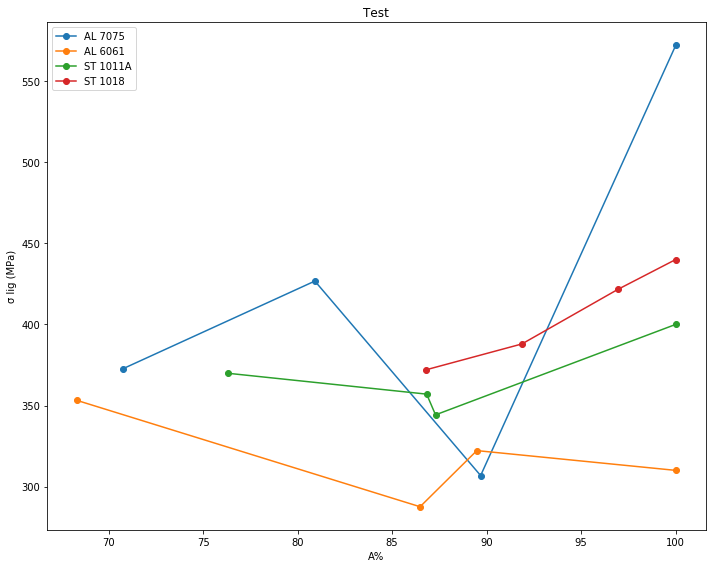

In [139]:
x = "A%"
y = "σ lig (MPa)"
data_sorted = df.sort_values(x, ascending=True)

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111)

for mat in df["Material"].unique():
    subset = data_sorted[data_sorted["Material"]==mat]
    plt.plot(x,y, data=subset, linestyle='-', marker='o', label=mat)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title("Ligament Effective Ultimate Strength vs Percent of Full Specimen Area")
plt.legend()
fig.tight_layout()
